In [2]:
import numpy as np
from graspy.simulations import sample_edges
from graspy.plot import heatmap
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import copy
import warnings
from simulations_corr_copy import sample_edges_corr, er_corr, sbm_corr

In [3]:
# tests for rho < 0 of sample_edges
p = 0.5
r = -0.9
P = p * np.ones((n,n))
R = r * np.ones((n,n))
a = sample_edges(P, directed=False, loops=False)
b, c = sample_edges_corr(P, R, directed=False, loops=False)
print(a)

[[0. 0. 1. 1. 0.]
 [0. 0. 1. 0. 0.]
 [1. 1. 0. 1. 0.]
 [1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [4]:
# tests for rho < 0 of sample_edges_corr
n = 5
p = 0.5
r = -0.9
P = p * np.ones((n,n))
R = r * np.ones((n,n))
b, c = sample_edges_corr(P, R, directed=False, loops=False)
print(b,c)

[[0. 1. 1. 1. 0.]
 [1. 0. 1. 1. 1.]
 [1. 1. 0. 0. 1.]
 [1. 1. 0. 0. 0.]
 [0. 1. 1. 0. 0.]] [[0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 1.]
 [1. 0. 0. 1. 0.]]


In [5]:
# tests for rho < 0 of er_corr functions
n = 5
p = 0.5
r = -0.9
d, e = er_corr(n, p, r, directed=False, loops=False)
print(d,e)

[[0. 1. 1. 1. 1.]
 [1. 0. 1. 1. 0.]
 [1. 1. 0. 1. 1.]
 [1. 1. 1. 0. 0.]
 [1. 0. 1. 0. 0.]] [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 1. 0. 1. 0.]]


definite simulated P and Rho matrices


In [6]:
p = 0.5
r = 0.3
dim = 100
P = p * np.ones((dim,dim))
R = r * np.ones((dim,dim))

## tests for properties of sample_corr function



mean of revised probabilities of graph1 is  0.5000732323232323
mean of revised probabilities of graph2 is  0.49985883838383843


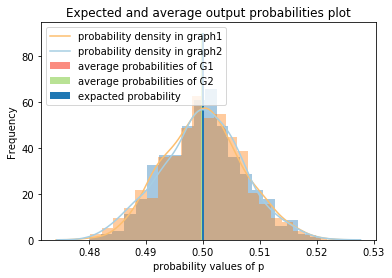

In [7]:
# return prob of G2 without diagnal elements
def test_sample_edges_corr_p(P, R, directed=False, loops=False):
    n = np.size(P,1)
    A, B = sample_edges_corr(P, R, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_sample_edges_corr_p(P, R, n):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (n):
        k1, k2 = test_sample_edges_corr_p(P, R, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()
density_sample_edges_corr_p(P, R, 800)

0.30020101010101014


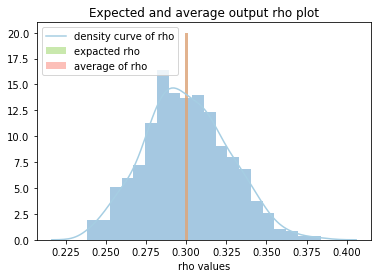

In [8]:
def test_sample_edges_corr_rho(P, R, pairs):
    folder2 = []
    h=0
    for i in range (pairs):
        n = np.size(P,1)
        g1, g2 = sample_edges_corr(P, R, directed=False, loops=False)
        P0 = np.copy(g1)
        add = g1+g2
        add[add!=2] = 0
        k = (add.sum()/2)/(n*(n-1))
        r = np.abs((k-p**2)/(p-p**2))
        folder2.append(r)
        h += r
    folder2.sort()
    avr = h/pairs
    print(avr)

    %matplotlib inline
    x2 = 0.3
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 20, width=0.002, alpha = 0.7, color='#b2df8a',label='expacted rho')
    plt.bar(avr, 20, width=0.002, alpha = 0.5, color='#fb8072',label='average of rho')
    plt.legend(loc='upper left')
    plt.title('Expected and average output rho plot')
    plt.show()

test_sample_edges_corr_rho(P, R, 800)

Expetation of the similarity is 
$p*[p+\rho*(1-p)] + (1-p)*[1-p*(1-\rho)]$.

If we output the simulated results from this function, 

we can see the results is close to what we expect:

In [5]:
# we can check the similarity between graph pairs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def test_sample_edges_corr_same(n):
    S = []
    judge = []
    dim = np.size(P,1)
    for i in range(n):
        A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
        judge = (A == B)+0
        S.append(judge)
    similarity = (np.sum(S)-dim*n)/(n*dim*(dim-1))
    return similarity
result = test_sample_edges_corr_same(1000)
m = p*(p+rho*(1-p)) + (1-p)*(1-p*(1-rho))
print(f'The calculated result of similarity is', result)
print(f'The expected result of similarity is', m)
print(f'The absolute difference is', (abs(result-m)/m)*100,'%')

The calculated result of similarity is 0.650120404040404
The expected result of similarity is 0.65
The absolute difference is 0.01852369852369721 %


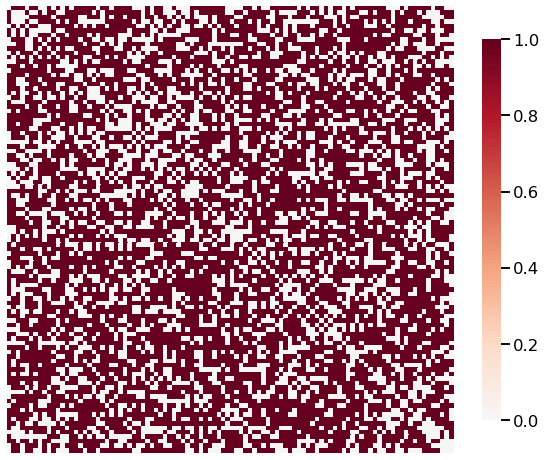

In [6]:
# show positions of the same values in both graphs
p = 0.5
rho = 0.3
dim = 100
P = p * np.ones((dim,dim))
Rho = rho * np.ones((dim,dim))
def show_sample_edges_corr_same():
    judge = []
    A, B = sample_edges_corr(P, Rho, directed=False, loops=False)
    judge = (A == B)+0
    heatmap(judge - np.diag(np.diag(judge)))
show_sample_edges_corr_same()

## tests for properties of er_corr function

In [120]:
n = 100
p = 0.5

In [10]:
def test_er_corr_p(n, p, r, directed=False, loops=False):
    A, B = er_corr(n, p, r, directed=False, loops=False)
    prob1 = A.sum()/(n*(n-1))
    prob2 = B.sum()/(n*(n-1))
    return prob1, prob2

# show the PDF of 1 probability of G2
def density_er_corr_p(n, p, r, times):
    folder1=[]
    folder2=[]
    k1 = 0
    k2 = 0
    sum1 = 0
    sum2 = 0
    for i in range (times):
        k1, k2 = test_er_corr_p(n, p, r, directed=False, loops=False)
        folder1.append(k1)
        folder2.append(k2)
    folder1.sort()
    folder2.sort()
    m1 = np.mean(folder1)
    m2 = np.mean(folder2)
    print(f'mean of revised probabilities of graph1 is ',m1)
    print(f'mean of revised probabilities of graph2 is ',m2)

    x1 = p
    
    sns.distplot(folder1,axlabel='probability values of p', kde_kws={"label":"probability density in graph1","color":"#fdbf6f"})
    sns.distplot(folder2,axlabel='probability values of p', kde_kws={"label":"probability density in graph2","color":"#a6cee3"})
    plt.bar(m1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of G1')
    plt.bar(m2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of G2')
    plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of graph1 is  0.5003777777777778
mean of revised probabilities of graph2 is  0.5001560606060607


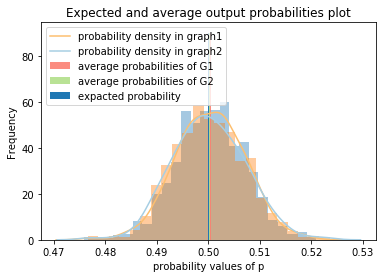

In [12]:
density_er_corr_p(100, 0.5, 0.01, 800)

mean of revised probabilities of graph1 is  0.4999159090909091
mean of revised probabilities of graph2 is  0.4999479797979799


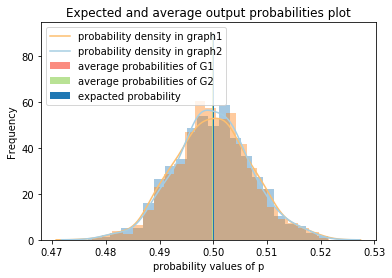

In [13]:
density_er_corr_p(100,0.5,0.5,800)

mean of revised probabilities of graph1 is  0.4996083333333333
mean of revised probabilities of graph2 is  0.49960025252525253


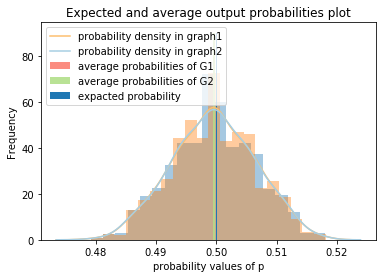

In [14]:
density_er_corr_p(100,0.5,0.999,800)

From the above figures, we can see that the value of rho(range from 0.01 to 0.99) will not influence the behavior of this function.

mean of revised probabilities of graph1 is  0.0
mean of revised probabilities of graph2 is  0.0


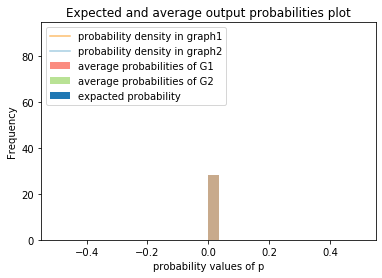

In [15]:
density_er_corr_p(100,0.00,0.3,800)

mean of revised probabilities of graph1 is  1.0
mean of revised probabilities of graph2 is  1.0


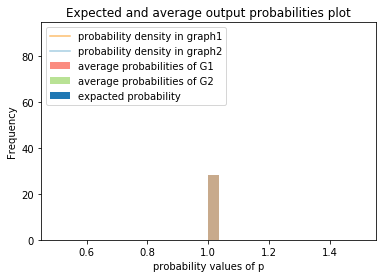

In [16]:
density_er_corr_p(100,1.00,0.3,800)

In [18]:
def test_er_corr_rho(n, p, r, directed=False, loops=False):
    g1, g2 = er_corr(n, p, r, directed=False, loops=False)
    P0 = np.copy(g1)
    add = g1+g2
    add[add!=2] = 0
    k = (add.sum()/2)/(n*(n-1))
    l = (k-p**2)/(p-p**2)
    return l
   
def density_er_corr_rho(n, p, r, pairs):
    folder2 = []
    h = 0
    l = 0
    for i in range (pairs):
        l = test_er_corr_rho(n, p, r, directed=False, loops=False)
        folder2.append(l)
        h += l
    
    folder2.sort()
    avr = h/pairs

    %matplotlib inline
    x2 = r
    sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 22, width=0.0015, alpha = 0.8, color='#b2df8a',label='expacted value of rho')
    plt.bar(avr, 22, width=0.0015, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='upper left')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

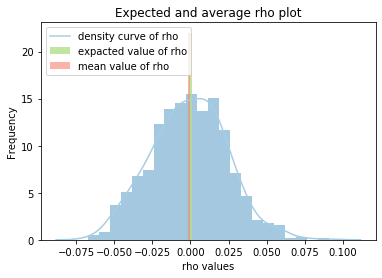

In [19]:
density_er_corr_rho(100,0.5,0.00,800)

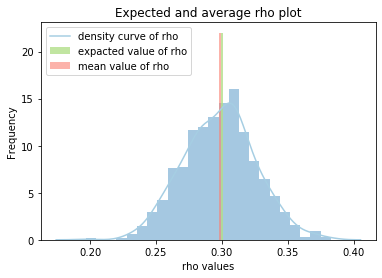

In [20]:
density_er_corr_rho(100,0.5,0.3,800)

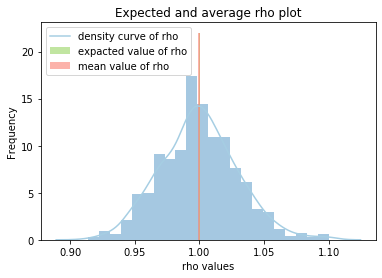

In [21]:
density_er_corr_rho(100,0.5,1.00,800)

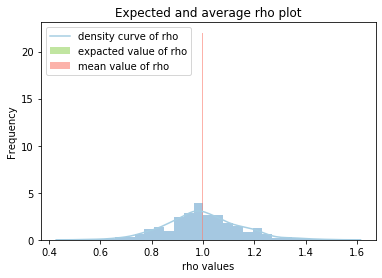

In [22]:
density_er_corr_rho(100,0.01,1.00,800)

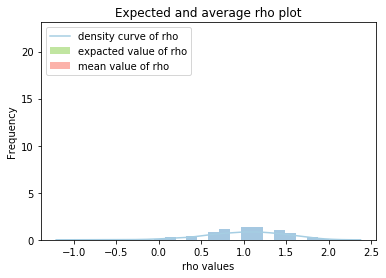

In [24]:
density_er_corr_rho(100,0.999,1.00,800)

Since the denominator of one of the fractions include $(p - p^2)$, we can not use 0.00 or 1.00 to test the influence of p on the accuracy of rho. But from the above figures, we can see that the value of p will not have a huge influence on rho.

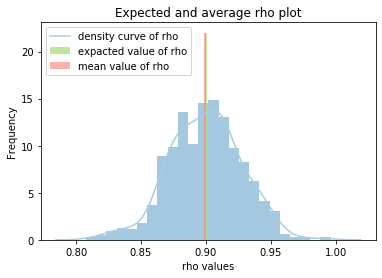

In [69]:
density_er_corr_rho(100,0.5,0.9,800)

## tests for properties of sbm_corr function

In [20]:
n = [100,100]
p = [[0.2, 0.6], [0.6, 0.2]]
r = 0.3

In [21]:
def test_sbm_corr_p(n, p, r, directed=False, loops=False):
    A, B = sbm_corr(n, p, r, directed=False, loops=False)
    a1, b1 = A[0:n[0],0:n[0]].copy(), A[0:n[0],n[0]:].copy()
    a2, b2 = B[0:n[0],0:n[0]].copy(), B[0:n[0],n[0]:].copy()
    pa1 = a1.sum()/(n[0]*(n[0]-1))
    pb1 = b1.sum()/(n[0]*n[1])
    pa2 = a2.sum()/(n[0]*(n[0]-1))
    pb2 = b2.sum()/(n[0]*n[1])
    return pa1, pb1, pa2, pb2

test_sbm_corr_p(n, p, r)

(0.1995959595959596, 0.5867, 0.1997979797979798, 0.5894)

In [22]:
# show the PDF of 1 probability of G1 and G2
def density_sbm_corr_p(times):
    foldera1=[]
    folderb1=[]
    foldera2=[]
    folderb2=[]
    ka1 = 0
    kb1 = 0
    ka2 = 0
    kb2 = 0
    suma1 = 0
    sumb1 = 0
    suma2 = 0
    sumb2 = 0

    for i in range (times):
        ka1, kb1, ka2, kb2 = test_sbm_corr_p(n, p, r, directed=False, loops=False)
        foldera1.append(ka1)
        folderb1.append(kb1)
        foldera2.append(ka2)
        folderb2.append(kb2)
    foldera1.sort()
    foldera2.sort()
    folderb1.sort()
    folderb2.sort()
    ma1 = np.mean(foldera1)
    ma2 = np.mean(foldera2)
    mb1 = np.mean(folderb1)
    mb2 = np.mean(folderb2)
    print(f'mean of revised probabilities of subpart1 of graph1 is ',ma1)
    print(f'mean of revised probabilities of subpart2 of graph1 is ',mb1)
    print(f'mean of revised probabilities of subpart1 of graph2 is ',ma2)
    print(f'mean of revised probabilities of subpart2 of graph2 is ',mb2)

    x1,x2 = p[0][0], p[0][1]
    
    sns.distplot(foldera1,axlabel='probability values of subpart1 p1', kde_kws={"label":"edge probability of subpart1 of graph1","color":"red"})
    sns.distplot(foldera2,axlabel='probability values of subpart2 p1', kde_kws={"label":"edge probability of subpart1 of graph2","color":"blue"})
    sns.distplot(folderb1,axlabel='probability values of subpart1 p2', kde_kws={"label":"edge probability of subpart2 of graph1","color":"green"})
    sns.distplot(folderb2,axlabel='probability values of subpart2 p2', kde_kws={"label":"edge probability of subpart2 of graph2","color":"#fdbf6f"})

#     plt.bar(ma1, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of subpart1 of G1')
#     plt.bar(mb1, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of subpart1 of G2')
#     plt.bar(ma2, 90, width=0.0003, alpha = 0.9, color='#fb8072',label='average probabilities of subpart2 of G1')
#     plt.bar(mb2, 90, width=0.0003, alpha = 0.9, color='#b2df8a',label='average probabilities of subpart2 of G2')
    
#     plt.bar(x1, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability p1')
#     plt.bar(x2, 90, width=0.0002, alpha = 1, color='#1f78b4',label='expacted probability p2')
    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of subpart1 of graph1 is  0.20022080808080808
mean of revised probabilities of subpart2 of graph1 is  0.5999175999999999
mean of revised probabilities of subpart1 of graph2 is  0.20022949494949496
mean of revised probabilities of subpart2 of graph2 is  0.599779


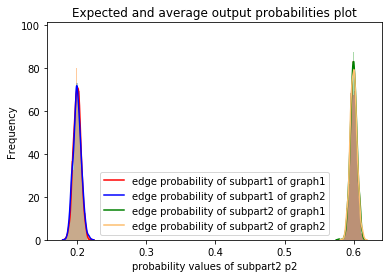

In [23]:
r = 0.3
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.20010606060606062
mean of revised probabilities of subpart2 of graph1 is  0.5998496
mean of revised probabilities of subpart1 of graph2 is  0.19989878787878787
mean of revised probabilities of subpart2 of graph2 is  0.5998529


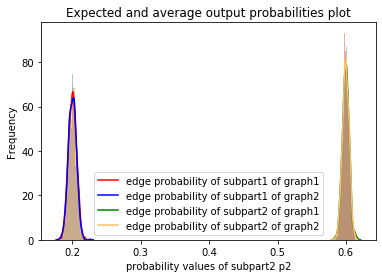

In [24]:
r = 0.01
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.200040202020202
mean of revised probabilities of subpart2 of graph1 is  0.5997153
mean of revised probabilities of subpart1 of graph2 is  0.20001656565656567
mean of revised probabilities of subpart2 of graph2 is  0.5997239999999999


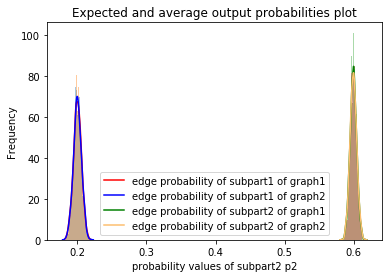

In [25]:
r = 0.99
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_p(1000)

From the above figures, we can see that the value of rho(range from 0.01 to 0.99) will not influence the behavior of this function.

mean of revised probabilities of subpart1 of graph1 is  0.0009931313131313132
mean of revised probabilities of subpart2 of graph1 is  0.9989991
mean of revised probabilities of subpart1 of graph2 is  0.0009991919191919194
mean of revised probabilities of subpart2 of graph2 is  0.9989996000000001


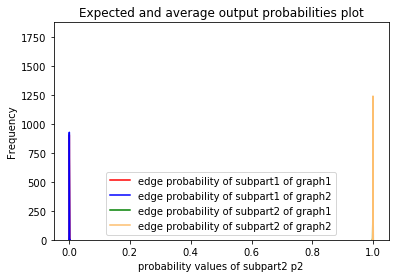

In [26]:
r = 0.99
p = [[0.001, 0.999], [0.999, 0.001]]
n = [100,100]
density_sbm_corr_p(1000)

In [80]:
n=[100,100]
p = [[0.4, 0.6], [0.6, 0.4]]
r = 0.3
def test_sbm_corr_rho(n, p, r, directed=False, loops=False):
    A, B = sbm_corr(n, p, r, directed=False, loops=False)
    pa1, pb1 = A[0:n[0],0:n[0]].copy(), A[0:n[0],n[0]:].copy()
    pa2, pb2 = B[0:n[0],0:n[0]].copy(), B[0:n[0],n[0]:].copy()
    #print(pa1,pa2)
    #pa1, pb1, pa2, pb2 = test_sbm_corr_p(n, p, r, directed=False, loops=False)
    # P0 = np.copy(g1)
    add1 = pa1+pa2
    add1[add1!=2] = 0
    k1 = (add1.sum()/2)/(n[0]*(n[0]-1))
    l1 = (k1-p[0][0]**2)/(p[0][0]-p[0][0]**2)
    
    add2 = pb1+pb2
    add2[add2!=2] = 0
    k2 = (add2.sum()/2)/(n[0]*n[1])
    l2 = (k2-p[0][1]**2)/(p[0][1]-p[0][1]**2)
    return l1, l2
test_sbm_corr_rho(n, p, r, directed=False, loops=False)

(0.2878787878787878, 0.33416666666666667)

In [107]:
def density_sbm_corr_rho(pairs):
#     folder1 = []
#     folder2 = []
    folder = []
    h1 = 0
    l1 = 0
    h2 = 0
    l2 = 0
    for i in range (pairs):
        l1,l2 = test_sbm_corr_rho(n, p, r, directed=False, loops=False)
        folder.append(l1)
        folder.append(l2)
        h1 += l1
        h2 += l2
    folder.sort()
    avr1 = h1/pairs
    avr2 = h2/pairs
    avr = (avr1+avr2)/2

    %matplotlib inline
    x2 = r
    #sns.distplot(folder1,axlabel='rho values', kde_kws={"label":"density curve of rho of subpart1","color":"#a6cee3"})
    #sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho of subpart2","color":"#a6cee3"})
    sns.distplot(folder,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 25, width=0.002, alpha = 0.8, color='blue',label='expacted value of rho')
    #plt.bar(avr1, 22, width=0.002, alpha = 0.6, color='orange',label='mean value of rho of subpart1')
    #plt.bar(avr2, 22, width=0.002, alpha = 0.6, color='#fb8072',label='mean value of rho of subpart2')
    plt.bar(avr, 25, width=0.002, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()


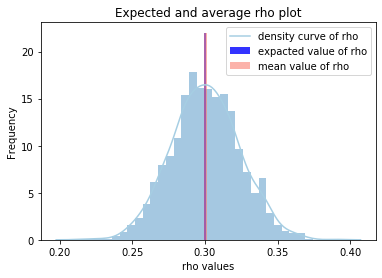

In [82]:
r = 0.3
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(800)

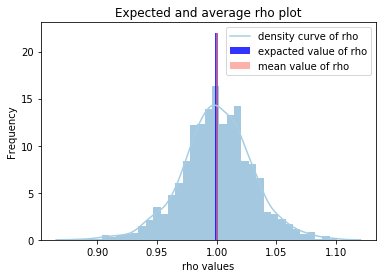

In [83]:
# if r is close to 1
r = 1.00
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(800)

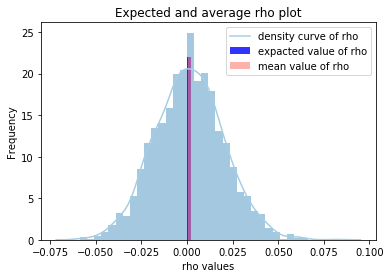

In [84]:
# if r is close to 0
r = 0.001
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(1000)

From the above figures, we can see that the value of rho(range from 0.01 to 0.99) will not influence the behavior of this function.

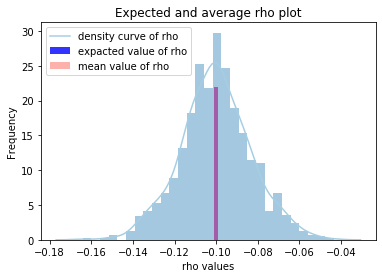

In [85]:
# if r is negative
r = -0.1
p = [[0.2, 0.6], [0.6, 0.2]]
n = [100,100]
density_sbm_corr_rho(500)

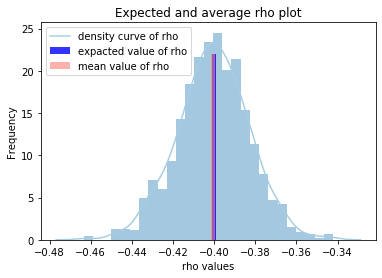

In [86]:
# if r is negative
r = -0.4
p = [[0.5, 0.5], [0.5, 0.5]]
n = [100,100]
density_sbm_corr_rho(500)

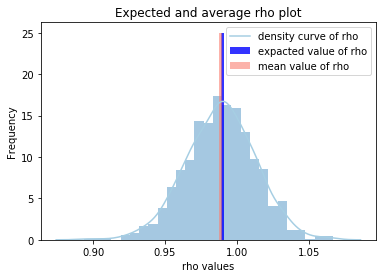

In [106]:
r = 0.99
p = [[0.5, 0.5], [0.5, 0.5]]
n = [100,100]
density_sbm_corr_rho(500)

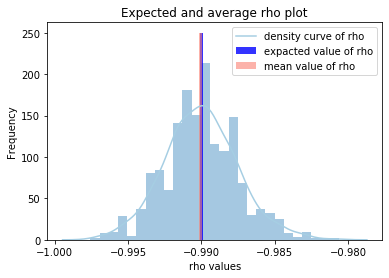

In [109]:
r = -0.99
p = [[0.5, 0.5], [0.5, 0.5]]
n = [100,100]
density_sbm_corr_rho(500)

## Test for Bear's rho_sbm codes

In [113]:
from bear_sbm import non_diagonal,rho_sbm

In [114]:
k=[100,100]
n=200
AL=[[0.2,0.6],[0.6,0.2]]
BL=AL
rho = 0.3
A, B = rho_sbm(rho, k, AL, BL, n)

In [115]:
def test_bear_sbm_p(rho, k, AL, BL, n):
    A, B = rho_sbm(rho, k, AL, BL, n)
    a1, b1 = A[0:k[0],0:k[0]].copy(), A[0:k[0],k[0]:].copy()
    a2, b2 = B[0:k[0],0:k[0]].copy(), B[0:k[0],k[0]:].copy()
    pa1 = a1.sum()/(k[0]*(k[0]-1))
    pb1 = b1.sum()/(k[0]*k[1])
    pa2 = a2.sum()/(k[0]*(k[0]-1))
    pb2 = b2.sum()/(k[0]*k[1])
    return pa1, pb1, pa2, pb2

test_bear_sbm_p(rho, k, AL, BL, n)

(0.20444444444444446, 0.5946, 0.20020202020202021, 0.595)

In [116]:
# show the PDF of 1 probability of G1 and G2
def density_sbm_corr_p(times):
    foldera1=[]
    folderb1=[]
    foldera2=[]
    folderb2=[]
    ka1 = 0
    kb1 = 0
    ka2 = 0
    kb2 = 0
    suma1 = 0
    sumb1 = 0
    suma2 = 0
    sumb2 = 0

    for i in range (times):
        ka1, kb1, ka2, kb2 = test_bear_sbm_p(rho, k, AL, BL, n)
        foldera1.append(ka1)
        folderb1.append(kb1)
        foldera2.append(ka2)
        folderb2.append(kb2)
    foldera1.sort()
    foldera2.sort()
    folderb1.sort()
    folderb2.sort()
    ma1 = np.mean(foldera1)
    ma2 = np.mean(foldera2)
    mb1 = np.mean(folderb1)
    mb2 = np.mean(folderb2)
    print(f'mean of revised probabilities of subpart1 of graph1 is ',ma1)
    print(f'mean of revised probabilities of subpart2 of graph1 is ',mb1)
    print(f'mean of revised probabilities of subpart1 of graph2 is ',ma2)
    print(f'mean of revised probabilities of subpart2 of graph2 is ',mb2)

    x1,x2 = AL[0][0], AL[0][1]
    
    sns.distplot(foldera1,axlabel='probability values of subpart1 p1', kde_kws={"label":"edge probability of subpart1 of graph1","color":"red"})
    sns.distplot(foldera2,axlabel='probability values of subpart2 p1', kde_kws={"label":"edge probability of subpart1 of graph2","color":"blue"})
    sns.distplot(folderb1,axlabel='probability values of subpart1 p2', kde_kws={"label":"edge probability of subpart2 of graph1","color":"green"})
    sns.distplot(folderb2,axlabel='probability values of subpart2 p2', kde_kws={"label":"edge probability of subpart2 of graph2","color":"#fdbf6f"})

    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average output probabilities plot')
    plt.show()

mean of revised probabilities of subpart1 of graph1 is  0.20185292929292928
mean of revised probabilities of subpart2 of graph1 is  0.599981
mean of revised probabilities of subpart1 of graph2 is  0.20208262626262627
mean of revised probabilities of subpart2 of graph2 is  0.6000905


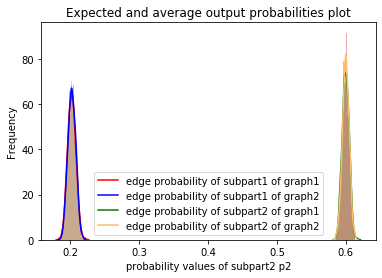

In [117]:
density_sbm_corr_p(1000)

mean of revised probabilities of subpart1 of graph1 is  0.0010035353535353534
mean of revised probabilities of subpart2 of graph1 is  0.9989811
mean of revised probabilities of subpart1 of graph2 is  0.0010076767676767675
mean of revised probabilities of subpart2 of graph2 is  0.9989838999999999


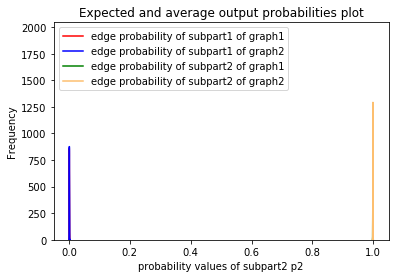

In [91]:
k=[100,100]
n=200
AL=[[0.001,0.999],[0.999,0.001]]
BL=AL
rho = 0.3
density_sbm_corr_p(1000)

In [118]:
def test_bear_sbm_rho(rho, k, AL, BL, n):
    A, B = rho_sbm(rho, k, AL, BL, n)
    pa1, pb1 = A[0:k[0],0:k[0]].copy(), A[0:k[0],k[0]:].copy()
    pa2, pb2 = B[0:k[0],0:k[0]].copy(), B[0:k[0],k[0]:].copy()
    add1 = pa1+pa2
    add1[add1!=2] = 0
    k1 = (add1.sum()/2)/(k[0]*(k[0]-1))
    l1 = (k1-AL[0][0]**2)/(AL[0][0]-AL[0][0]**2)
    
    add2 = pb1+pb2
    add2[add2!=2] = 0
    k2 = (add2.sum()/2)/(k[0]*k[1])
    l2 = (k2-AL[0][1]**2)/(AL[0][1]-AL[0][1]**2)
    return l1, l2
test_bear_sbm_rho(rho, k, AL, BL, n)

(0.2714646464646464, 0.30583333333333346)

In [119]:
def density_bear_sbm_rho(pairs):
    folder1 = []
    folder2 = []
    folder = []
    h1 = 0
    l1 = 0
    h2 = 0
    l2 = 0
    for i in range (pairs):
        l1,l2 = test_bear_sbm_rho(rho, k, AL, BL, n)
        folder.append(l1)
        folder.append(l2)
        h1 += l1
        h2 += l2
    folder.sort()
    avr1 = h1/pairs
    avr2 = h2/pairs
    avr = (avr1+avr2)/2

    %matplotlib inline
    x2 = rho
    #sns.distplot(folder1,axlabel='rho values', kde_kws={"label":"density curve of rho of subpart1","color":"#a6cee3"})
    #sns.distplot(folder2,axlabel='rho values', kde_kws={"label":"density curve of rho of subpart2","color":"#a6cee3"})
    sns.distplot(folder,axlabel='rho values', kde_kws={"label":"density curve of rho","color":"#a6cee3"})
    plt.bar(x2, 22, width=0.0015, alpha = 0.8, color='blue',label='expacted value of rho')
    #plt.bar(avr1, 22, width=0.0015, alpha = 0.6, color='orange',label='mean value of rho of subpart1')
    #plt.bar(avr2, 22, width=0.0015, alpha = 0.6, color='#fb8072',label='mean value of rho of subpart2')
    plt.bar(avr, 22, width=0.0015, alpha = 0.6, color='#fb8072',label='mean value of rho')
    plt.legend(loc='best')
    plt.ylabel('Frequency')
    plt.title('Expected and average rho plot')
    plt.show()

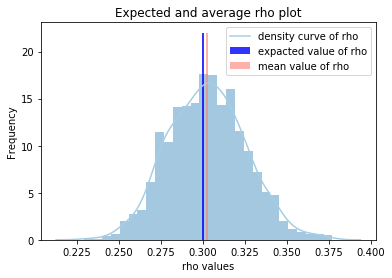

In [120]:
density_bear_sbm_rho(800)

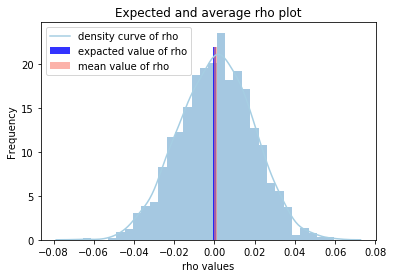

In [103]:
k=[100,100]
n=200
AL=[[0.2,0.6],[0.6,0.2]]
BL=AL
rho = 0.0
density_bear_sbm_rho(800)

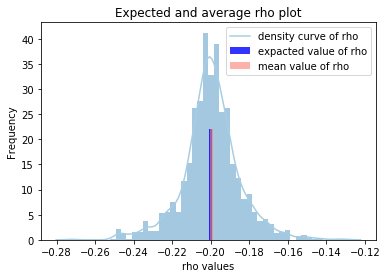

In [104]:
k=[100,100]
n=200
AL=[[0.2,0.6],[0.6,0.2]]
BL=AL
rho = -0.2
density_bear_sbm_rho(800)

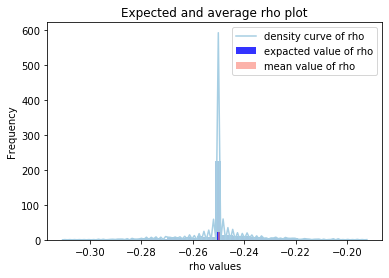

In [105]:
rho = -0.25
density_bear_sbm_rho(800)

In [106]:
rho = -0.3
density_bear_sbm_rho(800)

ValueError: p < 0

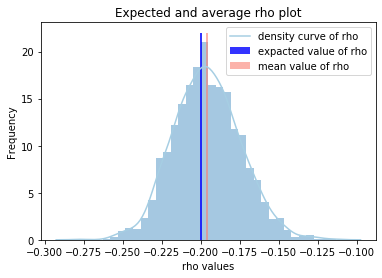

In [121]:
AL=[[0.5,0.6],[0.6,0.5]]
BL=AL
rho = -0.2
density_bear_sbm_rho(800)